# Neural Network from scratch

## Import packages

Set src directory to the path where the NeuralNetwork.py file is located.

In [1]:
import sys
import os

# Add the 'src' directory to the Python path
src_dir = os.path.join(os.path.dirname(os.getcwd()), 'src')
sys.path.append(src_dir)

In [2]:
from NeuralNetwork import Neural_Network
from GD_class import GradientDescent
from cost_functions import Cost_Functions
import numpy as np
import jax.numpy as jnp
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
import seaborn as sns

## Initiate neural network

1. Set up the design matrix with the inputs as discussed above and a vector containing the output, the so-called targets. Note that the design matrix is the same for all gates. You need just to define different outputs.

In [3]:
#np.random.seed(1234)

# Create design matrix
X = jnp.array([[0, 0],
               [0, 1],
               [1, 0],
               [1, 1]])

#X = jnp.array([[0, 1]])

# The XOR gate
target_XOR = jnp.array( [ 0, 1 ,1, 0])
# The OR gate
target_OR = jnp.array( [ 0, 1 ,1, 1])
# The AND gate
target_AND = jnp.array( [ 0, 0 ,0, 1])

target = jnp.array([0])

2. Construct a neural network with only one hidden layer and two hidden nodes using the Sigmoid function as activation function.

In [4]:
cost_function = Cost_Functions('LogReg', target_AND)

In [5]:
n_hidden_layers = 1
n_hidden_nodes = 2
n_outputs = 1
learning_rate=0.1
n_inputs = X.shape[1]

ffnn = Neural_Network(n_inputs, n_hidden_layers, n_hidden_nodes, n_outputs, 
                      cost_function=cost_function,
                      learning_rate=learning_rate, activation_function_hidden='sigmoid',
                      activation_function_output='sigmoid',
                      optimizer=None,
                      classification_problem=False)

str(ffnn)

'Neural Network with 1 hidden layers and [2] nodes per layer. The activation function for hidden layers is sigmoid.The activation function for the output layer is sigmoid.'

3. Set up the output layer with only one output node and use again the Sigmoid function as activation function for the output.

In [6]:
print(f'Output layer has {ffnn.output_layer.n_nodes} node and uses the {str(ffnn.output_layer.activation_function)} as activation function')

Output layer has 1 node and uses the sigmoid as activation function


4. Initialize the weights and biases and perform a feed forward pass and compare the outputs with the targets.

In [7]:
print('Weights hidden layer 1:\n'
      f'{ffnn.hidden_layers[0].weights}')
print('Biases hidden layer 1:\n'
      f'{ffnn.hidden_layers[0].biases}')

print('weights output layer:\n'
      f'{ffnn.output_layer.weights}')
print('Biases output layer:\n'
      f'{ffnn.output_layer.biases}')

Weights hidden layer 1:
[[-0.85345855 -1.18063865]
 [ 1.63548248 -0.47329652]]
Biases hidden layer 1:
[[0.01 0.01]]
weights output layer:
[[1.70840109]
 [0.24862644]]
Biases output layer:
[[0.01]]


In [8]:
ffnn.feed_forward(X)

print("Final prediction before training:\n"
      f"{ffnn.output_layer.output}")

Final prediction before training:
[[0.72976017]
 [0.82319397]
 [0.6417019 ]
 [0.77313423]]


5. Set up the cost function (cross entropy for classification of binary cases).

6. Calculate the gradients needed for the back propagation part.

7. Use the gradients to train the network in the back propagation part. Think of using automatic differentiation.

In [9]:
ffnn.feed_backward(X)

print('Weights and biases after one backward propagation: \n')

print('Weights hidden layer 1:\n'
      f'{ffnn.hidden_layers[0].weights}')
print('Biases hidden layer 1:\n'
      f'{ffnn.hidden_layers[0].biases}')

print('weights output layer:\n'
      f'{ffnn.output_layer.weights}')
print('Biases output layer:\n'
      f'{ffnn.output_layer.biases}')


Weights and biases after one backward propagation: 

Weights hidden layer 1:
[[-0.95345855 -1.2806387 ]
 [ 1.5354824  -0.5732965 ]]
Biases hidden layer 1:
[[-0.09000001 -0.08999998]]
weights output layer:
[[1.6084011 ]
 [0.14862645]]
Biases output layer:
[[-0.09000001]]


8. Train the network and study your results and compare with results obtained either with scikit-learn or TensorFlow.

In [10]:
ffnn.train(X, num_iter=50)

print('Weights and biases after training: \n')

print('Weights hidden layer 1:\n'
      f'{ffnn.hidden_layers[0].weights}')
print('Biases hidden layer 1:\n'
      f'{ffnn.hidden_layers[0].biases}')

print('weights output layer:\n'
      f'{ffnn.output_layer.weights}')
print('Biases output layer:\n'
      f'{ffnn.output_layer.biases}')

print("\nFinal prediction after training:\n"
      f"{ffnn.output_layer.output}")


Weights and biases after training: 

Weights hidden layer 1:
[[-2.2600265  -2.5499673 ]
 [ 0.11966576 -1.4009757 ]]
Biases hidden layer 1:
[[-1.4058027 -1.2759368]]
weights output layer:
[[ 0.3718968 ]
 [-0.51763517]]
Biases output layer:
[[-1.0266767]]

Final prediction after training:
[[0.25701708]
 [0.2741561 ]
 [0.26446393]
 [0.26633945]]


In [7]:
lr=0.1
lmbd=0.001

optimizer = GradientDescent(learning_rate=lr)

ffnn = Neural_Network(n_inputs, n_hidden_layers, n_hidden_nodes, n_outputs, 
                              cost_function=cost_function,
                              learning_rate=lr, 
                              lmbd=lmbd, 
                              activation_function_hidden='sigmoid',
                              activation_function_output='sigmoid',
                              optimizer=None,
                              classification_problem=True)

weigths = ffnn.train(X, num_iter=1000)
pred = ffnn.output_layer.output

[[ 0.01        0.01        0.01        0.01      ]
 [ 1.0575786   1.0559382   0.8737173  -0.11209158]
 [-0.17310853  1.0689691  -0.38784024  0.34743765]
 [ 0.87447     2.1149075   0.47587708  0.22534609]]
[[0.5025     0.5025     0.5025     0.5025    ]
 [0.74222755 0.7419136  0.7055186  0.47200638]
 [0.45683056 0.7444008  0.40423733 0.5859961 ]
 [0.70567495 0.8923437  0.61677384 0.5560993 ]]
[[ 0.6150697  -0.77949226  0.8049703  -0.54854786]
 [ 0.6904811  -1.1811937   0.96197855 -0.42434564]
 [ 0.6665322  -0.7956431   0.858937   -1.2821971 ]
 [ 0.73892    -1.1568848   1.0195127  -0.94708604]]
[[0.6490964  0.31442934 0.69103664 0.36620134]
 [0.666074   0.23483767 0.7235177  0.39547735]
 [0.66072625 0.31095827 0.70243853 0.21717645]
 [0.67675966 0.23923378 0.73487765 0.27947122]]
[[-1.363563 ]
 [-1.4013742]
 [-1.3642164]
 [-1.4062501]]
[[0.20366184]
 [0.19759814]
 [0.20355588]
 [0.19682617]]
[[-0.08999977  0.10999911 -0.08999894 -0.08999991]
 [ 0.8575791   1.0559392   0.6737191  -0.312091

[[-0.09721689  0.10927065 -0.15663758  0.04561988]
 [-0.08540383 -0.09208117 -0.33626238 -0.01175846]
 [-0.18025976 -0.11222796 -0.11852355  0.19786838]
 [-0.1684467  -0.3135798  -0.29814833  0.14049004]]
[[0.4757149  0.52729046 0.46092048 0.511403  ]
 [0.47866198 0.476996   0.41671765 0.4970604 ]
 [0.4550567  0.4719724  0.47040373 0.5493063 ]
 [0.45798764 0.42224118 0.42601022 0.5350649 ]]
[[ 0.58521664 -0.7609643   0.5841669  -0.4510622 ]
 [ 0.5619629  -0.75881946  0.5789196  -0.4335171 ]
 [ 0.60354537 -0.7586509   0.58802176 -0.4436551 ]
 [ 0.580378   -0.7565641   0.5828751  -0.4262212 ]]
[[0.64226687 0.31843695 0.64202565 0.38910824]
 [0.6369066  0.31890264 0.6408187  0.39328682]
 [0.64646703 0.31893924 0.64291114 0.39087036]
 [0.64115435 0.3193927  0.6417287  0.39502907]]
[[-1.1518477]
 [-1.1447189]
 [-1.1577439]
 [-1.1506853]]
[[0.24015175]
 [0.24145505]
 [0.23907748]
 [0.24036393]]
[[-0.1055914   0.09449542 -0.1710607   0.04038649]
 [-0.12082148 -0.09030927 -0.33777028 -0.017436

[[-0.12718016  0.08295768 -0.2110773   0.06177092]
 [-0.1921353   0.12794279 -0.15928541  0.09387355]
 [-0.11159736  0.13292754 -0.20423663  0.06280658]
 [-0.1765525   0.17791262 -0.15244474  0.09490921]]
[[0.46824777 0.5207275  0.44742575 0.5154378 ]
 [0.45211342 0.5319421  0.4602626  0.5234512 ]
 [0.4721296  0.53318304 0.4491176  0.5156965 ]
 [0.45597616 0.5443612  0.46196246 0.52370954]]
[[ 0.5404704  -0.85855967  0.33871612 -0.64185846]
 [ 0.54653853 -0.8591758   0.33640996 -0.636151  ]
 [ 0.5426442  -0.85845053  0.3404244  -0.64065903]
 [ 0.54870754 -0.8590675   0.3381108  -0.634953  ]]
[[0.6319218  0.29764035 0.58387864 0.34482655]
 [0.63333213 0.29751155 0.5833182  0.3461171 ]
 [0.6324273  0.29766318 0.58429366 0.34509757]
 [0.6338357  0.2975342  0.5837316  0.34638834]]
[[-1.0891016]
 [-1.0906451]
 [-1.0899181]
 [-1.0914586]]
[[0.2517875 ]
 [0.25149682]
 [0.2516337 ]
 [0.25134373]]
[[-0.12507902  0.0913489  -0.20558237  0.06527471]
 [-0.18076013  0.12709999 -0.16056189  0.100713

[[-0.11379018  0.13900252 -0.17388186  0.08784522]
 [-0.08955194  0.15774228 -0.1631778   0.10716701]
 [-0.11145158  0.156583   -0.17417483  0.0865238 ]
 [-0.08721334  0.17532276 -0.16347077  0.1058456 ]]
[[0.4715831  0.5346948  0.45663875 0.5219472 ]
 [0.47762695 0.539354   0.4592958  0.5267662 ]
 [0.4721659  0.53906596 0.45656607 0.5216175 ]
 [0.47821045 0.54371876 0.4592231  0.52643675]]
[[ 0.5194307  -0.84076816  0.23905097 -0.6269876 ]
 [ 0.5229215  -0.8405188   0.2402223  -0.6268756 ]
 [ 0.519843   -0.84071624  0.23928146 -0.62712765]
 [ 0.52333325 -0.8404669   0.24045257 -0.6270154 ]]
[[0.62701464 0.30137303 0.5594798  0.34819388]
 [0.6278307  0.30142552 0.55976844 0.34821934]
 [0.6271111  0.30138397 0.5595366  0.3481621 ]
 [0.6279269  0.30143645 0.5598252  0.3481876 ]]
[[-1.1014479]
 [-1.1025298]
 [-1.1015831]
 [-1.1026645]]
[[0.24946871]
 [0.24926622]
 [0.2494434 ]
 [0.24924098]]
[[-0.11312345  0.14199454 -0.1716907   0.08879271]
 [-0.09043241  0.16241659 -0.15808551  0.107042

[[-0.10107223  0.20146462 -0.12866634  0.10447105]
 [-0.10562279  0.20196517 -0.13074885  0.10712648]
 [-0.09893739  0.20053169 -0.1282516   0.11364666]
 [-0.10348795  0.20103222 -0.1303341   0.11630208]]
[[0.4747534  0.55019647 0.46787775 0.526094  ]
 [0.47361884 0.5503203  0.4673593  0.52675605]
 [0.4752858  0.54996556 0.46798098 0.5283811 ]
 [0.47415107 0.5500895  0.46746254 0.5290428 ]]
[[ 0.48024327 -0.7987481   0.23103566 -0.55597305]
 [ 0.4802758  -0.79875034  0.23100777 -0.5559837 ]
 [ 0.48094326 -0.79872906  0.23111075 -0.5559656 ]
 [ 0.4809757  -0.7987313   0.23108283 -0.5559762 ]]
[[0.6178053  0.31029338 0.55750334 0.36447972]
 [0.617813   0.31029287 0.5574965  0.36447725]
 [0.6179706  0.31029746 0.5575219  0.36448148]
 [0.6179783  0.31029695 0.55751497 0.364479  ]]
[[-1.0964538]
 [-1.0964589]
 [-1.0966425]
 [-1.0966475]]
[[0.25040492]
 [0.25040397]
 [0.25036952]
 [0.25036857]]
[[-0.10058904  0.20410146 -0.12682086  0.10504358]
 [-0.10473618  0.20591839 -0.12809952  0.107617

[[-0.0891906   0.27023995 -0.08275972  0.11725048]
 [-0.08608715  0.270724   -0.08258937  0.12108884]
 [-0.08809546  0.27053687 -0.08151601  0.12096182]
 [-0.08499201  0.27102092 -0.08134566  0.12480018]]
[[0.47771716 0.56715184 0.47932187 0.5292791 ]
 [0.47849146 0.56727064 0.47936437 0.53023523]
 [0.47799033 0.56722474 0.47963226 0.53020364]
 [0.47876477 0.56734353 0.47967476 0.53115964]]
[[ 0.44889617 -0.6985513   0.2721709  -0.46630704]
 [ 0.44916183 -0.6985392   0.27222282 -0.46629146]
 [ 0.449135   -0.6985407   0.27221614 -0.46629295]
 [ 0.44940066 -0.6985286   0.27226806 -0.46627736]]
[[0.6103768  0.3321335  0.56762576 0.3854907 ]
 [0.6104399  0.33213618 0.5676385  0.3854944 ]
 [0.6104335  0.33213586 0.56763685 0.38549405]
 [0.6104967  0.33213854 0.5676496  0.38549772]]
[[-1.0973359]
 [-1.0974053]
 [-1.0973982]
 [-1.0974677]]
[[0.2502394 ]
 [0.25022638]
 [0.25022772]
 [0.2502147 ]]
[[-0.0887381   0.27292985 -0.08105428  0.11767565]
 [-0.08584149  0.27384916 -0.08080932  0.121520

[[-1.0980633]
 [-1.0980935]
 [-1.0980935]
 [-1.0981238]]
[[0.25010294]
 [0.2500973 ]
 [0.2500973 ]
 [0.2500916 ]]
[[-0.07834499  0.3345915  -0.04395001  0.1261586 ]
 [-0.07734702  0.33573255 -0.04318656  0.12826125]
 [-0.0770961   0.33563885 -0.04288352  0.12794617]
 [-0.07609814  0.3367799  -0.04212007  0.13004884]]
[[0.48042375 0.58287615 0.4890143  0.5314979 ]
 [0.4806729  0.58315355 0.48920503 0.5320214 ]
 [0.4807355  0.5831308  0.48928082 0.53194296]
 [0.4809846  0.5834081  0.48947152 0.5324665 ]]
[[ 0.42762148 -0.5561768   0.31888255 -0.33420637]
 [ 0.4277409  -0.55616724  0.3189167  -0.3341941 ]
 [ 0.4277398  -0.55616707  0.31891724 -0.33419392]
 [ 0.4278592  -0.5561576   0.3189514  -0.3341816 ]]
[[0.60530555 0.3644325  0.5790519  0.4172175 ]
 [0.60533404 0.36443475 0.5790602  0.41722047]
 [0.6053338  0.36443478 0.5790604  0.41722056]
 [0.60536236 0.364437   0.5790687  0.41722354]]
[[-1.0979114]
 [-1.097941 ]
 [-1.0979409]
 [-1.0979708]]
[[0.25013146]
 [0.25012589]
 [0.2501259 ]

[[-0.06998192  0.3846317  -0.01637609  0.13143493]
 [-0.06930751  0.38553545 -0.01573676  0.13242675]
 [-0.06923258  0.385499   -0.01562577  0.1325775 ]
 [-0.06855817  0.38640276 -0.01498644  0.1335693 ]]
[[0.48251167 0.5949897  0.49590605 0.5328115 ]
 [0.48268008 0.5952075  0.49606588 0.5330584 ]
 [0.4826988  0.5951987  0.49609363 0.5330959 ]
 [0.48286718 0.5954164  0.49625352 0.5333428 ]]
[[ 0.4178074  -0.39277506  0.3582604  -0.19267015]
 [ 0.41786182 -0.39276877  0.35827893 -0.19266257]
 [ 0.41786683 -0.39276823  0.35828057 -0.1926619 ]
 [ 0.41792125 -0.39276195  0.35829908 -0.19265433]]
[[0.6029585  0.40304947 0.5886193  0.4519809 ]
 [0.6029715  0.40305096 0.58862376 0.45198283]
 [0.6029727  0.40305108 0.5886241  0.45198295]
 [0.6029857  0.4030526  0.5886286  0.45198482]]
[[-1.0980129]
 [-1.0980257]
 [-1.0980268]
 [-1.0980394]]
[[0.25011238]
 [0.25011003]
 [0.25010982]
 [0.25010747]]
[[-0.06967476  0.38648808 -0.01538857  0.1316069 ]
 [-0.0690275   0.3874123  -0.01475525  0.132578

[[-0.06348997  0.42429438  0.00424481  0.13479528]
 [-0.06296951  0.424906    0.00468908  0.13539816]
 [-0.06302276  0.42489746  0.00472369  0.13534917]
 [-0.06250229  0.42550907  0.00516796  0.13595206]]
[[0.48413283 0.60451037 0.5010612  0.5336479 ]
 [0.48426282 0.60465664 0.5011723  0.5337979 ]
 [0.48424953 0.60465455 0.50118095 0.5337857 ]
 [0.4843795  0.60480076 0.501292   0.5339357 ]]
[[ 0.41462028 -0.20044702  0.39650404 -0.03170569]
 [ 0.41464758 -0.20044279  0.39651445 -0.0317008 ]
 [ 0.41464663 -0.20044294  0.3965141  -0.03170098]
 [ 0.41467395 -0.20043872  0.39652446 -0.03169609]]
[[0.6021952  0.45005536 0.59784746 0.49207425]
 [0.60220176 0.45005637 0.5978499  0.4920755 ]
 [0.6022015  0.45005637 0.59784985 0.49207538]
 [0.6022081  0.45005745 0.5978523  0.49207667]]
[[-1.098107 ]
 [-1.0981128]
 [-1.0981126]
 [-1.0981185]]
[[0.25009474]
 [0.25009367]
 [0.25009373]
 [0.2500926 ]]
[[-0.06325967  0.42571983  0.00496936  0.13490514]
 [-0.06275385  0.42632195  0.00541107  0.135492

[[-0.05909428  0.45173213  0.01803064  0.13680789]
 [-0.05879153  0.45211288  0.01832297  0.13714585]
 [-0.05878964  0.45211256  0.01832785  0.13715976]
 [-0.05848689  0.45249328  0.01862018  0.13749774]]
[[0.48523068 0.61105096 0.50450754 0.53414875]
 [0.48530638 0.6111415  0.5045806  0.5342328 ]
 [0.48530683 0.6111414  0.5045818  0.53423625]
 [0.4853824  0.61123186 0.5046549  0.5343204 ]]
[[ 0.4151795  -0.00331429  0.4304411   0.12758487]
 [ 0.41519198 -0.00331185  0.43044633  0.1275876 ]
 [ 0.4151922  -0.00331182  0.43044642  0.12758765]
 [ 0.41520467 -0.00330939  0.43045163  0.12759039]]
[[0.60232913 0.49917144 0.60597897 0.531853  ]
 [0.6023322  0.49917203 0.6059802  0.5318537 ]
 [0.6023322  0.49917203 0.6059803  0.5318537 ]
 [0.6023352  0.49917263 0.6059815  0.53185445]]
[[-1.0981495]
 [-1.098152 ]
 [-1.098152 ]
 [-1.0981545]]
[[0.25008678]
 [0.2500863 ]
 [0.2500863 ]
 [0.25008583]]
[[-0.05892594  0.45279217  0.0185574   0.13688193]
 [-0.05862705  0.45316243  0.01884655  0.137212

[[-0.05582214  0.4724483   0.02827935  0.1382215 ]
 [-0.05564548  0.47266755  0.0284602   0.13842525]
 [-0.05564079  0.47266874  0.02845682  0.1384207 ]
 [-0.05546413  0.472888    0.02863767  0.13862444]]
[[0.48604804 0.6159631  0.5070694  0.5345005 ]
 [0.4860922  0.61601496 0.5071146  0.5345512 ]
 [0.4860934  0.6160152  0.50711375 0.53455   ]
 [0.4861375  0.6160671  0.50715894 0.53460073]]
[[0.41771537 0.21736464 0.46394762 0.29982114]
 [0.41772085 0.21736595 0.46395013 0.2998226 ]
 [0.41772082 0.21736595 0.46395013 0.2998226 ]
 [0.41772628 0.21736726 0.46395263 0.29982403]]
[[0.60293645 0.5541282  0.6139502  0.57439876]
 [0.60293776 0.5541285  0.61395085 0.5743992 ]
 [0.60293776 0.5541285  0.61395085 0.5743992 ]
 [0.60293907 0.5541289  0.61395144 0.57439953]]
[[-1.0981979]
 [-1.0981989]
 [-1.0981989]
 [-1.0982   ]]
[[0.25007772]
 [0.25007752]
 [0.25007752]
 [0.25007734]]
[[-0.05570589  0.47318834  0.02864442  0.138271  ]
 [-0.05553308  0.47340155  0.02882186  0.13847008]
 [-0.0555287

[[-0.05359946  0.48663116  0.03528325  0.1391655 ]
 [-0.05349554  0.4867585   0.0353884   0.13928163]
 [-0.05349516  0.48675832  0.03538772  0.13928291]
 [-0.05339124  0.48688567  0.03549287  0.13939904]]
[[0.48660332 0.6193125  0.5088199  0.5347353 ]
 [0.48662934 0.6193425  0.50884616 0.53476423]
 [0.4866294  0.6193425  0.508846   0.5347645 ]
 [0.48665532 0.6193725  0.5088723  0.53479344]]
[[0.4213476  0.4441641  0.49509147 0.47177413]
 [0.42134988 0.44416475 0.49509263 0.47177485]
 [0.42134988 0.44416475 0.49509266 0.47177485]
 [0.42135218 0.4441654  0.49509382 0.47177556]]
[[0.60380566 0.6092508  0.6213051  0.61580354]
 [0.6038062  0.60925096 0.6213054  0.6158038 ]
 [0.6038062  0.60925096 0.6213054  0.6158038 ]
 [0.6038068  0.60925114 0.62130564 0.61580396]]
[[-1.0982426]
 [-1.098243 ]
 [-1.098243 ]
 [-1.0982435]]
[[0.25006932]
 [0.25006926]
 [0.25006926]
 [0.25006917]]
[[-0.05352199  0.4871263   0.03552848  0.13919841]
 [-0.0534208   0.48725104  0.03563086  0.13931176]
 [-0.0534201

[[-0.0521375   0.4959688   0.03992682  0.13978791]
 [-0.05207846  0.49604106  0.03998594  0.13985412]
 [-0.05207878  0.49604106  0.03998598  0.13985361]
 [-0.05201974  0.49611333  0.0400451   0.13991983]]
[[0.48696855 0.6215115  0.5099804  0.5348902 ]
 [0.48698336 0.62152857 0.50999516 0.5349066 ]
 [0.48698327 0.62152857 0.50999516 0.53490657]
 [0.48699796 0.6215455  0.51000994 0.534923  ]]
[[0.42562485 0.6674771  0.52362514 0.63758457]
 [0.42562577 0.6674774  0.5236256  0.6375849 ]
 [0.42562577 0.6674774  0.5236256  0.6375849 ]
 [0.4256267  0.6674777  0.52362615 0.6375852 ]]
[[0.6048284  0.660938   0.627995   0.6542073 ]
 [0.60482866 0.6609381  0.62799513 0.6542073 ]
 [0.60482866 0.6609381  0.62799513 0.6542073 ]
 [0.6048289  0.6609381  0.6279953  0.65420735]]
[[-1.0982819]
 [-1.098282 ]
 [-1.098282 ]
 [-1.0982821]]
[[0.250062  ]
 [0.25006196]
 [0.25006196]
 [0.25006193]]
[[-0.05208732  0.4962887   0.04008683  0.13980934]
 [-0.05202985  0.49635902  0.04014452  0.13987388]
 [-0.0520300

[[-0.05125986  0.50155073  0.0427343   0.14016367]
 [-0.05121964  0.5016112   0.04278457  0.1402049 ]
 [-0.05121926  0.5016111   0.04278867  0.14020506]
 [-0.05117904  0.50167155  0.04283895  0.14024629]]
[[0.48718786 0.6228237  0.5106819  0.53498363]
 [0.48719788 0.6228379  0.5106945  0.53499395]
 [0.487198   0.62283784 0.5106955  0.53499395]
 [0.48720807 0.6228521  0.5107081  0.5350042 ]]
[[0.43012106 0.86574066 0.54790455 0.7825497 ]
 [0.43012157 0.86574095 0.54790485 0.7825499 ]
 [0.4301216  0.86574095 0.54790485 0.78255   ]
 [0.4301221  0.8657412  0.5479052  0.7825502 ]]
[[0.6059026  0.7038587  0.6336493  0.6862294 ]
 [0.6059027  0.70385873 0.6336494  0.6862294 ]
 [0.60590273 0.70385873 0.6336494  0.6862294 ]
 [0.6059028  0.70385873 0.6336494  0.6862295 ]]
[[-1.100838]
 [-1.100838]
 [-1.100838]
 [-1.100838]]
[[0.24958293]
 [0.24958293]
 [0.24958293]
 [0.24958293]]
[[-0.05123792  0.5016892   0.04280856  0.14017348]
 [-0.05120865  0.50171405  0.04283498  0.1402094 ]
 [-0.05120934  0

[[-0.02993106  0.620739    0.12367932  0.1504333 ]
 [-0.03167064  0.6233428   0.12636596  0.15161079]
 [-0.03178641  0.62333906  0.12631978  0.15156734]
 [-0.03352599  0.6259429   0.12900642  0.15274481]]
[[0.49251777 0.6503866  0.53088045 0.5375376 ]
 [0.492083   0.6509784  0.5315495  0.5378303 ]
 [0.4920541  0.6509776  0.531538   0.53781945]
 [0.4916193  0.651569   0.53220695 0.5381121 ]]
[[0.46762058 1.1190645  0.637265   1.0214413 ]
 [0.46764028 1.1190451  0.6372885  1.0214273 ]
 [0.46763948 1.1190462  0.63728756 1.0214276 ]
 [0.46765918 1.1190269  0.637311   1.0214136 ]]
[[0.6148204  0.7538152  0.654135   0.7352533 ]
 [0.61482507 0.75381154 0.65414023 0.73525053]
 [0.6148249  0.7538118  0.65414006 0.7352506 ]
 [0.6148296  0.7538082  0.65414536 0.73524785]]
[[-1.0818143]
 [-1.0818156]
 [-1.0818155]
 [-1.0818168]]
[[0.25316283]
 [0.2531626 ]
 [0.25316262]
 [0.25316238]]
[[-0.02924594  0.6245479   0.12614277  0.15075031]
 [-0.03100765  0.62674844  0.12894306  0.1514972 ]
 [-0.0309657

[[-0.02187925  0.66510105  0.15272926  0.15415387]
 [-0.02231134  0.66564333  0.15251572  0.15475081]
 [-0.02203144  0.6656253   0.15345518  0.15476772]
 [-0.02246352  0.66616756  0.15324165  0.15536468]]
[[0.49453044 0.66040534 0.5381083  0.53846234]
 [0.4944224  0.66052693 0.53805524 0.5386107 ]
 [0.49449235 0.66052294 0.5382887  0.53861487]
 [0.49438435 0.6606445  0.53823566 0.5387632 ]]
[[0.46796858 1.277755   0.63772035 1.1582822 ]
 [0.46796983 1.2777554  0.6377205  1.158283  ]
 [0.46797216 1.2777548  0.63772094 1.1582835 ]
 [0.4679734  1.2777553  0.6377211  1.1582843 ]]
[[0.61490285 0.78206736 0.654238   0.7610204 ]
 [0.6149031  0.7820675  0.654238   0.7610206 ]
 [0.6149037  0.78206736 0.6542381  0.7610207 ]
 [0.614904   0.7820675  0.65423816 0.76102084]]
[[-1.1029679]
 [-1.102968 ]
 [-1.1029681]
 [-1.1029682]]
[[0.24918424]
 [0.2491842 ]
 [0.24918418]
 [0.24918418]]
[[-0.0217888   0.66558206  0.15307866  0.15419826]
 [-0.02211383  0.6662111   0.1531974   0.15480262]
 [-0.0217903

[[0.24966633]
 [0.24966633]
 [0.24966633]
 [0.24966633]]
[[-0.02063436  0.67203075  0.15714383  0.15471588]
 [-0.02061566  0.67209095  0.15692252  0.15466206]
 [-0.0204832   0.67208034  0.15729728  0.15467753]
 [-0.0204645   0.67214054  0.15707599  0.1546237 ]]
[[0.49484158 0.66195774 0.5392053  0.538602  ]
 [0.49484625 0.6619712  0.5391503  0.53858864]
 [0.49487936 0.6619688  0.53924346 0.53859246]
 [0.4948841  0.6619823  0.53918844 0.5385791 ]]
[[0.46517792 1.3267326  0.6642909  1.1965921 ]
 [0.4651778  1.3267326  0.6642907  1.1965921 ]
 [0.4651782  1.3267326  0.6642912  1.1965923 ]
 [0.46517804 1.3267326  0.664291   1.1965923 ]]
[[0.6142418  0.79029965 0.6602236  0.767918  ]
 [0.6142418  0.79029965 0.6602236  0.767918  ]
 [0.6142419  0.79029965 0.66022366 0.767918  ]
 [0.61424184 0.79029965 0.66022366 0.767918  ]]
[[-1.0981305]
 [-1.0981305]
 [-1.0981305]
 [-1.0981305]]
[[0.25009036]
 [0.25009036]
 [0.25009036]
 [0.25009036]]
[[-0.02061471  0.67214334  0.15721396  0.15472485]
 [-0.0

[[-0.02032802  0.67382795  0.15819183  0.15484972]
 [-0.0202786   0.673861    0.15813097  0.15480185]
 [-0.02032335  0.67385703  0.15815671  0.1548024 ]
 [-0.02027393  0.6738901   0.15809585  0.15475452]]
[[0.4949182  0.6623598  0.5394657  0.53863525]
 [0.49493057 0.66236717 0.5394505  0.53862333]
 [0.49491936 0.6623663  0.53945696 0.5386235 ]
 [0.4949317  0.66237366 0.5394418  0.53861165]]
[[0.47178146 1.3639503  0.67724365 1.2296156 ]
 [0.47178143 1.3639503  0.67724365 1.2296156 ]
 [0.47178143 1.3639503  0.67724365 1.2296154 ]
 [0.4717814  1.3639503  0.67724365 1.2296154 ]]
[[0.6158053  0.796401   0.6631232  0.77375126]
 [0.61580527 0.796401   0.6631232  0.77375126]
 [0.61580527 0.796401   0.6631232  0.77375126]
 [0.61580527 0.796401   0.6631232  0.77375126]]
[[-1.0977834]
 [-1.0977834]
 [-1.0977834]
 [-1.0977834]]
[[0.25015545]
 [0.25015545]
 [0.25015545]
 [0.25015545]]
[[-0.02031992  0.67387646  0.15821959  0.1548533 ]
 [-0.02027535  0.6739318   0.15816234  0.15481016]
 [-0.0203296

[[-0.02018606  0.6746596   0.15867327  0.15491146]
 [-0.02019067  0.67468005  0.15865627  0.15490317]
 [-0.02019144  0.67468005  0.15866521  0.15490152]
 [-0.02019606  0.6747005   0.1586482   0.15489323]]
[[0.4949537  0.66254574 0.5395853  0.5386506 ]
 [0.49495253 0.66255033 0.53958106 0.53864855]
 [0.4949523  0.66255033 0.5395833  0.5386481 ]
 [0.49495113 0.66255486 0.53957903 0.5386461 ]]
[[0.47655898 1.3982184  0.6915823  1.2620068 ]
 [0.47655898 1.3982184  0.6915823  1.2620068 ]
 [0.47655898 1.3982184  0.6915823  1.2620068 ]
 [0.47655898 1.3982184  0.6915823  1.2620068 ]]
[[0.61693496 0.80190104 0.66631883 0.7793714 ]
 [0.61693496 0.80190104 0.66631883 0.7793714 ]
 [0.61693496 0.80190104 0.66631883 0.7793714 ]
 [0.61693496 0.80190104 0.66631883 0.7793714 ]]
[[-1.0984747]
 [-1.0984747]
 [-1.0984747]
 [-1.0984747]]
[[0.2500258]
 [0.2500258]
 [0.2500258]
 [0.2500258]]
[[-0.0201816   0.67468613  0.15868814  0.15491338]
 [-0.02018925  0.67470235  0.15867585  0.15490346]
 [-0.02018237  0

[[0.5027726  1.5452049  0.7576673  1.4048696 ]
 [0.5027813  1.5452365  0.757685   1.4049001 ]
 [0.50277823 1.5452259  0.75767887 1.4048892 ]
 [0.5027869  1.5452574  0.75769657 1.4049197 ]]
[[0.6231107  0.8242201  0.6808471  0.8029555 ]
 [0.62311274 0.8242247  0.680851   0.8029603 ]
 [0.623112   0.8242231  0.68084955 0.8029586 ]
 [0.62311405 0.8242277  0.6808534  0.80296344]]
[[-1.0588454]
 [-1.0588468]
 [-1.0588464]
 [-1.0588479]]
[[0.25753018]
 [0.25752988]
 [0.25752997]
 [0.2575297 ]]
[[-0.01367609  0.7077066   0.18173863  0.15779789]
 [-0.01151519  0.70755386  0.18198209  0.15968199]
 [-0.01155526  0.70756745  0.18085006  0.15969577]
 [-0.00939436  0.7074147   0.18109351  0.16157988]]
[[0.49658102 0.6698942  0.54531    0.5393678 ]
 [0.49712119 0.6698604  0.5453704  0.5398359 ]
 [0.49711117 0.66986346 0.5450897  0.5398393 ]
 [0.49765146 0.6698296  0.54515004 0.5403073 ]]
[[0.5135261  1.582608   0.7818563  1.4425685 ]
 [0.51353776 1.5826471  0.7818805  1.4426068 ]
 [0.5135343  1.58263

[[ 4.9039489e-05  7.7809238e-01  2.2964597e-01  1.6383311e-01]
 [-4.0857217e-04  7.7784526e-01  2.2901815e-01  1.6415881e-01]
 [-3.7250854e-04  7.7782887e-01  2.3026682e-01  1.6418208e-01]
 [-8.3012017e-04  7.7758175e-01  2.2963901e-01  1.6450778e-01]]
[[0.5000123  0.6852688  0.55716056 0.5408669 ]
 [0.49989787 0.68521553 0.5570056  0.5409478 ]
 [0.49990693 0.685212   0.55731374 0.5409536 ]
 [0.4997925  0.68515867 0.55715877 0.54103446]]
[[0.5306302  1.6677797  0.7821229  1.5214194 ]
 [0.53062844 1.667777   0.78212416 1.5214169 ]
 [0.53063047 1.6677809  0.78212243 1.521421  ]
 [0.53062874 1.6677781  0.7821236  1.5214185 ]]
[[0.6296301  0.84127957 0.68613744 0.8207474 ]
 [0.6296297  0.8412792  0.68613774 0.820747  ]
 [0.62963015 0.84127975 0.6861373  0.8207476 ]
 [0.62962973 0.8412794  0.6861376  0.82074726]]
[[-1.1082398]
 [-1.1082397]
 [-1.1082399]
 [-1.1082398]]
[[0.24819921]
 [0.24819924]
 [0.24819918]
 [0.24819921]]
[[ 2.4965906e-04  7.7906382e-01  2.3034227e-01  1.6392004e-01]
 [-

[[0.0025259  0.79067594 0.23824501 0.16491184]
 [0.00262347 0.79054433 0.23841584 0.1650517 ]
 [0.00246895 0.7905517  0.23828876 0.16505769]
 [0.00256651 0.7904201  0.23845959 0.16519755]]
[[0.50063145 0.6879764  0.5592811  0.5411348 ]
 [0.50065583 0.6879482  0.55932325 0.5411695 ]
 [0.50061727 0.6879498  0.5592919  0.54117095]
 [0.50064164 0.6879215  0.559334   0.5412057 ]]
[[0.52038026 1.6834692  0.81671107 1.5418559 ]
 [0.5203802  1.6834692  0.81671107 1.541856  ]
 [0.52038026 1.6834692  0.816711   1.5418559 ]
 [0.5203802  1.6834692  0.816711   1.541856  ]]
[[0.62723666 0.84336334 0.6935377  0.8237344 ]
 [0.62723666 0.84336334 0.6935377  0.8237344 ]
 [0.62723666 0.84336334 0.6935377  0.8237344 ]
 [0.62723666 0.84336334 0.6935377  0.8237344 ]]
[[-1.0947144]
 [-1.0947144]
 [-1.0947144]
 [-1.0947144]]
[[0.25073156]
 [0.25073156]
 [0.25073156]
 [0.25073156]]
[[0.00255704 0.79084796 0.23835279 0.16492553]
 [0.00260191 0.79069084 0.23843022 0.16507138]
 [0.00245589 0.7906918  0.23851928 0

[[0.00283828 0.7922726  0.2393328  0.16504803]
 [0.00280225 0.7922928  0.2392879  0.16509153]
 [0.00287332 0.792288   0.23928215 0.1650955 ]
 [0.00283728 0.79230815 0.23923725 0.16513899]]
[[0.5007096  0.6883191  0.5595493  0.5411686 ]
 [0.50070053 0.68832344 0.5595382  0.5411794 ]
 [0.5007183  0.6883224  0.5595367  0.5411804 ]
 [0.5007093  0.6883267  0.55952567 0.54119116]]
[[0.52912426 1.6988338  0.82553643 1.5555038 ]
 [0.52912426 1.6988338  0.82553643 1.5555038 ]
 [0.52912426 1.6988338  0.82553643 1.5555038 ]
 [0.52912426 1.6988338  0.82553643 1.5555038 ]]
[[0.62927884 0.84538233 0.6954103  0.82570726]
 [0.62927884 0.84538233 0.6954103  0.82570726]
 [0.62927884 0.84538233 0.6954103  0.82570726]
 [0.62927884 0.84538233 0.6954103  0.82570726]]
[[-1.0976249]
 [-1.0976249]
 [-1.0976249]
 [-1.0976249]]
[[0.2501852]
 [0.2501852]
 [0.2501852]
 [0.2501852]]
[[0.00284466 0.7923034  0.23935534 0.16505086]
 [0.00282684 0.79235464 0.23929429 0.1650992 ]
 [0.0028895  0.79235214 0.23928913 0.165

[[0.00291648 0.79267186 0.23960224 0.16508186]
 [0.00291016 0.79265845 0.23962182 0.16509824]
 [0.00291057 0.7926572  0.23958531 0.16509753]
 [0.00290425 0.7926438  0.23960489 0.16511391]]
[[0.50072914 0.68840474 0.5596156  0.541177  ]
 [0.50072753 0.6884019  0.5596205  0.541181  ]
 [0.50072765 0.68840164 0.55961144 0.5411809 ]
 [0.5007261  0.6883987  0.55961627 0.54118496]]
[[0.530418   1.7128837  0.83216375 1.5686817 ]
 [0.53041804 1.7128837  0.83216375 1.5686817 ]
 [0.530418   1.7128837  0.83216375 1.5686817 ]
 [0.530418   1.7128837  0.83216375 1.5686817 ]]
[[0.6295806 0.84721   0.6968123 0.8275956]
 [0.6295806 0.84721   0.6968123 0.8275956]
 [0.6295806 0.84721   0.6968123 0.8275956]
 [0.6295806 0.84721   0.6968123 0.8275956]]
[[-1.0988973]
 [-1.0988973]
 [-1.0988973]
 [-1.0988973]]
[[0.24994655]
 [0.24994655]
 [0.24994655]
 [0.24994655]]
[[0.00291786 0.79267955 0.239607   0.16508245]
 [0.00290663 0.7926789  0.2396176  0.16509643]
 [0.00291904 0.7926769  0.23958683 0.1650949 ]
 [0.0

[[0.00930118 0.82347596 0.26166266 0.16783105]
 [0.0089202  0.8238163  0.2622572  0.16806793]
 [0.00894383 0.823821   0.2617853  0.16805589]
 [0.00856285 0.82416135 0.26237985 0.16829278]]
[[0.5023253  0.6949737  0.565045   0.54185957]
 [0.50223005 0.6950458  0.5651911  0.54191834]
 [0.50223595 0.69504684 0.5650751  0.54191536]
 [0.5021407  0.69511896 0.56522125 0.5419742 ]]
[[0.5877455 1.8014402 0.9281304 1.6656808]
 [0.5877486 1.8014407 0.9281341 1.6656815]
 [0.5877468 1.8014408 0.9281321 1.6656814]
 [0.5877499 1.8014413 0.9281358 1.665682 ]]
[[0.64284766 0.85832417 0.71669585 0.8409991 ]
 [0.64284843 0.8583242  0.71669656 0.8409992 ]
 [0.64284796 0.8583242  0.7166962  0.8409992 ]
 [0.6428487  0.85832435 0.7166969  0.8409993 ]]
[[-1.0769813]
 [-1.0769814]
 [-1.0769814]
 [-1.0769815]]
[[0.2540777 ]
 [0.2540777 ]
 [0.2540777 ]
 [0.25407767]]
[[0.00993664 0.8267875  0.26385024 0.16810516]
 [0.00968878 0.82695633 0.2643089  0.16820227]
 [0.00979008 0.8269651  0.26357195 0.16818975]
 [0.0

[[0.01624298 0.8581552  0.28551835 0.17081115]
 [0.01615853 0.85826916 0.28571507 0.17069359]
 [0.01611212 0.8582761  0.2853016  0.17068797]
 [0.01602767 0.85839015 0.28549832 0.17057042]]
[[0.5040607  0.70227504 0.5708986  0.54259926]
 [0.5040395  0.70229894 0.5709468  0.5425701 ]
 [0.50402796 0.7023003  0.57084554 0.5425687 ]
 [0.5040068  0.7023242  0.5708937  0.5425395 ]]
[[0.5725575  1.8836087  0.9506681  1.7431464 ]
 [0.57255745 1.8836087  0.95066816 1.7431464 ]
 [0.5725578  1.8836092  0.9506677  1.7431468 ]
 [0.57255775 1.883609   0.95066774 1.7431468 ]]
[[0.6393531  0.86802506 0.7212495  0.8510863 ]
 [0.6393531  0.86802506 0.7212495  0.8510863 ]
 [0.6393532  0.8680251  0.7212494  0.8510863 ]
 [0.6393532  0.8680251  0.72124946 0.8510863 ]]
[[-1.0923207]
 [-1.0923207]
 [-1.0923207]
 [-1.0923207]]
[[0.25118154]
 [0.25118154]
 [0.25118154]
 [0.25118154]]
[[0.01636236 0.8587415  0.28592524 0.1708618 ]
 [0.01624311 0.85869193 0.28612235 0.17073002]
 [0.0162674  0.8587003  0.28579158 0

[[0.01761687 0.8648453  0.290227   0.1713972 ]
 [0.01758906 0.8648842  0.29018208 0.17143004]
 [0.01764815 0.8648805  0.29016802 0.1714337 ]
 [0.01762035 0.8649194  0.2901231  0.17146654]]
[[0.5044041  0.703672   0.5720517  0.5427447 ]
 [0.50439715 0.70368004 0.57204074 0.54275286]
 [0.50441194 0.7036793  0.5720373  0.54275376]
 [0.50440496 0.7036874  0.57202625 0.5427619 ]]
[[0.59017265 1.9208548  0.964068   1.7772796 ]
 [0.59017265 1.9208548  0.96406794 1.7772795 ]
 [0.59017265 1.9208548  0.964068   1.7772796 ]
 [0.59017265 1.9208548  0.96406794 1.7772795 ]]
[[0.6434047  0.8722337  0.7239356  0.8553606 ]
 [0.6434047  0.8722337  0.72393554 0.8553606 ]
 [0.6434047  0.8722337  0.7239356  0.8553606 ]
 [0.6434047  0.8722337  0.72393554 0.8553606 ]]
[[-1.0972282]
 [-1.0972282]
 [-1.0972282]
 [-1.0972282]]
[[0.25025964]
 [0.25025964]
 [0.25025964]
 [0.25025964]]
[[0.01763503 0.8649293  0.29028985 0.171405  ]
 [0.01762645 0.86497927 0.29024163 0.17144457]
 [0.01767445 0.8649794  0.2902396  0

[[0.01797482 0.86652064 0.2914548  0.17154959]
 [0.01805502 0.866611   0.29154775 0.1715845 ]
 [0.01804095 0.86661094 0.29154965 0.17158547]
 [0.01812115 0.8667013  0.29164258 0.17162038]]
[[0.5044936  0.70402116 0.5723523  0.5427825 ]
 [0.5045136  0.7040401  0.572375   0.5427912 ]
 [0.5045101  0.70404005 0.5723755  0.5427914 ]
 [0.50453013 0.7040589  0.5723982  0.5428001 ]]
[[0.5914514  1.9313618  0.97280955 1.7891968 ]
 [0.59145147 1.9313618  0.9728096  1.7891968 ]
 [0.59145147 1.9313618  0.9728096  1.7891968 ]
 [0.59145147 1.9313618  0.9728097  1.7891968 ]]
[[0.6436981  0.8734001  0.72567916 0.85682875]
 [0.6436981  0.8734001  0.72567916 0.85682875]
 [0.6436981  0.8734001  0.72567916 0.85682875]
 [0.6436981  0.8734001  0.72567916 0.85682875]]
[[-1.0661025]
 [-1.0661025]
 [-1.0661025]
 [-1.0661025]]
[[0.256145]
 [0.256145]
 [0.256145]
 [0.256145]]
[[0.01843882 0.8686724  0.2930476  0.17174722]
 [0.01886649 0.869545   0.29397884 0.17196128]
 [0.01889396 0.8695442  0.29420367 0.1719652

[[0.0316775  0.9326926  0.3384734  0.17740041]
 [0.03174039 0.9328936  0.33899036 0.17768022]
 [0.03190809 0.93290764 0.33794755 0.17767921]
 [0.03197099 0.9331086  0.3384645  0.17795902]]
[[0.5079187  0.7176212  0.5838196  0.54423416]
 [0.5079344  0.717662   0.5839452  0.54430354]
 [0.50797635 0.7176648  0.5836919  0.5443033 ]
 [0.5079921  0.7177055  0.5838175  0.5443727 ]]
[[0.6605637 2.1163626 1.0813695 1.9776602]
 [0.6605643 2.1163647 1.0813676 1.9776623]
 [0.6605641 2.1163628 1.0813692 1.9776603]
 [0.6605647 2.116365  1.0813671 1.9776626]]
[[0.659387   0.89248335 0.74675304 0.8784315 ]
 [0.6593871  0.89248365 0.74675274 0.8784318 ]
 [0.6593871  0.8924834  0.746753   0.8784315 ]
 [0.65938723 0.89248365 0.7467526  0.8784318 ]]
[[-1.0983027]
 [-1.0983027]
 [-1.0983027]
 [-1.0983027]]
[[0.25005805]
 [0.25005805]
 [0.25005805]
 [0.25005805]]
[[0.03201566 0.9343423  0.33962515 0.17754397]
 [0.03219266 0.9340364  0.33985686 0.17777659]
 [0.03226997 0.9340498  0.33914483 0.17776865]
 [0.0

[[0.03536466 0.9506169  0.3510329  0.17896207]
 [0.0354503  0.95076936 0.35088286 0.17887555]
 [0.03535277 0.95076525 0.35082656 0.17887527]
 [0.0354384  0.9509177  0.3506765  0.17878874]]
[[0.50884026 0.7212392  0.586868   0.5446215 ]
 [0.50886166 0.72126985 0.5868316  0.5446    ]
 [0.5088372  0.7212691  0.586818   0.54459995]
 [0.5088586  0.7212997  0.5867816  0.5445785 ]]
[[0.6795057  2.1495357  1.1379045  2.0153236 ]
 [0.6795056  2.1495357  1.1379045  2.0153239 ]
 [0.67950547 2.149536   1.1379046  2.0153239 ]
 [0.67950535 2.149536   1.1379046  2.0153239 ]]
[[0.6636284  0.89562535 0.7572947  0.8823966 ]
 [0.6636283  0.89562535 0.7572947  0.88239664]
 [0.6636283  0.89562535 0.7572947  0.88239664]
 [0.6636283  0.89562535 0.7572947  0.88239664]]
[[-1.0996937]
 [-1.0996937]
 [-1.0996937]
 [-1.0996937]]
[[0.24979733]
 [0.24979733]
 [0.24979733]
 [0.24979733]]
[[0.03542639 0.950916   0.35124472 0.17898834]
 [0.03547595 0.9510103  0.3512185  0.17891021]
 [0.03536073 0.95101863 0.35115656 0

[[0.03608124 0.95399094 0.35347793 0.17926557]
 [0.03610134 0.9539846  0.35351786 0.17925125]
 [0.03607552 0.9539791  0.35343453 0.17924756]
 [0.03609562 0.95397276 0.3534745  0.17923324]]
[[0.5090193  0.7219171  0.5874607  0.54469675]
 [0.5090244  0.7219158  0.58747035 0.54469323]
 [0.5090179  0.7219147  0.5874502  0.5446923 ]
 [0.50902295 0.7219134  0.58745986 0.54468876]]
[[0.67913735 2.1677446  1.1577832  2.0313582 ]
 [0.67913735 2.1677446  1.1577832  2.0313582 ]
 [0.67913735 2.1677446  1.1577832  2.0313582 ]
 [0.67913735 2.1677446  1.1577832  2.0313582 ]]
[[0.66354614 0.8973153  0.76092964 0.88405037]
 [0.66354614 0.8973153  0.76092964 0.88405037]
 [0.66354614 0.8973153  0.76092964 0.88405037]
 [0.66354614 0.8973153  0.76092964 0.88405037]]
[[-1.099333]
 [-1.099333]
 [-1.099333]
 [-1.099333]]
[[0.24986489]
 [0.24986489]
 [0.24986489]
 [0.24986489]]
[[0.0360898  0.9540312  0.35350716 0.1792692 ]
 [0.03611255 0.9540671  0.35350147 0.17924842]
 [0.03606956 0.9540647  0.35354665 0.179

[[0.03707619 0.95844907 0.35686004 0.1796845 ]
 [0.03734035 0.9582113  0.35674703 0.1799059 ]
 [0.03732395 0.95821345 0.35639256 0.17990549]
 [0.03758812 0.9579757  0.35627952 0.18012689]]
[[0.509268   0.72281116 0.58828014 0.54480064]
 [0.509334   0.72276354 0.5882528  0.54485554]
 [0.5093299  0.72276396 0.5881669  0.5448555 ]
 [0.50939596 0.7227164  0.58813953 0.5449103 ]]
[[0.7083881 2.210894  1.2072084 2.0764186]
 [0.7083883 2.2108943 1.2072088 2.0764189]
 [0.7083876 2.2108936 1.2072076 2.0764182]
 [0.7083878 2.2108939 1.207208  2.0764184]]
[[0.6700449  0.9012236  0.76980466 0.8885899 ]
 [0.6700449  0.9012236  0.7698047  0.88859004]
 [0.6700448  0.9012235  0.7698045  0.8885899 ]
 [0.67004484 0.9012235  0.76980454 0.8885899 ]]
[[-1.0582945]
 [-1.0582945]
 [-1.0582944]
 [-1.0582944]]
[[0.2576355 ]
 [0.2576355 ]
 [0.25763553]
 [0.25763553]]
[[0.03822872 0.9638392  0.36083052 0.18017578]
 [0.03907264 0.9651482  0.36221692 0.18074173]
 [0.03909497 0.9651429  0.36254087 0.18074541]
 [0.0

[[0.04874122 1.0145236  0.39685562 0.1846324 ]
 [0.04878727 1.0146505  0.39640716 0.18458302]
 [0.04891624 1.0146247  0.3973478  0.18459179]
 [0.04896228 1.0147516  0.39689934 0.1845424 ]]
[[0.5121829  0.73390454 0.597932   0.5460274 ]
 [0.5121944  0.73392934 0.5978241  0.54601514]
 [0.5122266  0.7339242  0.5980503  0.54601735]
 [0.5122381  0.73394895 0.5979425  0.54600513]]
[[0.75226724 2.3363557  1.3397799  2.2045057 ]
 [0.7522677  2.3363562  1.3397791  2.2045062 ]
 [0.7522662  2.3363552  1.3397813  2.204505  ]
 [0.7522667  2.3363554  1.3397804  2.2045054 ]]
[[0.67967254 0.9118436  0.79245377 0.90065336]
 [0.67967266 0.9118436  0.7924536  0.9006535 ]
 [0.6796723  0.9118436  0.792454   0.90065336]
 [0.6796724  0.9118436  0.7924538  0.90065336]]
[[-1.0964415]
 [-1.0964415]
 [-1.0964415]
 [-1.0964415]]
[[0.25040725]
 [0.25040725]
 [0.25040725]
 [0.25040725]]
[[0.0489529  1.015533   0.39757037 0.18472095]
 [0.04909118 1.0159638  0.39747855 0.18472591]
 [0.04908668 1.0159627  0.3970143  0

[[0.05100786 1.0251942  0.4045738  0.18558732]
 [0.0509479  1.0250309  0.4047528  0.18555033]
 [0.0510428  1.0250362  0.4046146  0.18554902]
 [0.05098284 1.0248728  0.4047936  0.18551204]]
[[0.5127492  0.73598313 0.59978604 0.5462641 ]
 [0.51273423 0.73595136 0.599829   0.54625493]
 [0.51275796 0.73595244 0.5997959  0.54625463]
 [0.51274294 0.73592067 0.59983885 0.54624546]]
[[0.7886988  2.3845353  1.3642294  2.2555828 ]
 [0.78869873 2.3845353  1.3642293  2.2555828 ]
 [0.78869873 2.3845353  1.3642293  2.2555828 ]
 [0.7886986  2.3845353  1.3642293  2.2555828 ]]
[[0.68755186 0.9156405  0.7964462  0.90513104]
 [0.6875518  0.9156405  0.7964462  0.90513104]
 [0.6875518  0.9156405  0.7964462  0.90513104]
 [0.6875518  0.9156405  0.7964462  0.90513104]]
[[-1.0931017]
 [-1.0931017]
 [-1.0931017]
 [-1.0931017]]
[[0.25103468]
 [0.25103468]
 [0.25103468]
 [0.25103468]]
[[0.05105316 1.0254334  0.4047272  0.18560614]
 [0.05102569 1.0254067  0.4048461  0.18556987]
 [0.05110954 1.0253897  0.4044495  0

[[0.05157992 1.0278437  0.40651155 0.18582697]
 [0.05161142 1.0278846  0.40651438 0.18582913]
 [0.05158351 1.0278937  0.4064635  0.18583171]
 [0.05161501 1.0279347  0.40646634 0.18583386]]
[[0.5128921  0.73649764 0.60025114 0.54632354]
 [0.5129     0.73650557 0.6002518  0.5463241 ]
 [0.5128931  0.73650736 0.6002396  0.5463247 ]
 [0.5129009  0.7365153  0.6002403  0.5463252 ]]
[[0.801312  2.4057417 1.3811454 2.27688  ]
 [0.8013121 2.4057417 1.3811454 2.27688  ]
 [0.801312  2.4057417 1.3811454 2.27688  ]
 [0.8013121 2.4057417 1.3811454 2.27688  ]]
[[0.6902551  0.91726416 0.7991749  0.9069441 ]
 [0.6902551  0.91726416 0.7991749  0.9069441 ]
 [0.6902551  0.91726416 0.7991749  0.9069441 ]
 [0.6902551  0.91726416 0.7991749  0.9069441 ]]
[[-1.1104143]
 [-1.1104143]
 [-1.1104143]
 [-1.1104143]]
[[0.2477937]
 [0.2477937]
 [0.2477937]
 [0.2477937]]
[[0.05160754 1.0279579  0.40660474 0.18583865]
 [0.05163483 1.0278913  0.40654117 0.18584643]
 [0.05159796 1.0278926  0.4065917  0.18584947]
 [0.05162

[[0.05721791 1.0543997  0.42568856 0.18819013]
 [0.0571729  1.0544057  0.4256961  0.18812537]
 [0.05708222 1.0544044  0.42570156 0.18812445]
 [0.05703721 1.0544103  0.4257091  0.18805969]]
[[0.5143006  0.7416189  0.6048437  0.54690915]
 [0.5142893  0.74162    0.60484546 0.5468931 ]
 [0.51426667 0.74161977 0.6048468  0.5468929 ]
 [0.51425546 0.7416209  0.60484856 0.5468768 ]]
[[0.8516521  2.505115   1.491597   2.3823428 ]
 [0.8516522  2.505115   1.4915969  2.3823428 ]
 [0.85165226 2.505115   1.4915968  2.3823428 ]
 [0.8516523  2.505115   1.4915967  2.3823428 ]]
[[0.70091355 0.92449963 0.81631786 0.9154709 ]
 [0.7009136  0.92449963 0.81631786 0.9154709 ]
 [0.7009136  0.92449963 0.81631786 0.9154709 ]
 [0.7009136  0.92449963 0.8163178  0.9154709 ]]
[[-1.1033732]
 [-1.1033732]
 [-1.1033732]
 [-1.1033732]]
[[0.2491084]
 [0.2491084]
 [0.2491084]
 [0.2491084]]
[[0.05740057 1.0552565  0.4263045  0.18826626]
 [0.05725669 1.0552405  0.42632645 0.18820168]
 [0.0572711  1.0552434  0.4264578  0.188

[[0.05940467 1.0644875  0.43310845 0.18910538]
 [0.05940729 1.0644478  0.43310857 0.18910861]
 [0.05947027 1.0644492  0.4330419  0.18911289]
 [0.05947288 1.0644094  0.43304202 0.18911612]]
[[0.5148468  0.74354714 0.60661566 0.54713595]
 [0.51484746 0.74353963 0.6066157  0.5471368 ]
 [0.5148632  0.74353987 0.6065998  0.54713786]
 [0.5148638  0.7435323  0.6065998  0.54713863]]
[[0.89041734 2.5556939  1.5379428  2.4321089 ]
 [0.89041734 2.5556939  1.5379428  2.4321089 ]
 [0.89041734 2.5556939  1.5379428  2.4321089 ]
 [0.89041734 2.5556939  1.5379428  2.4321089 ]]
[[0.70897627 0.9279551  0.8231655  0.9192432 ]
 [0.70897627 0.9279551  0.8231655  0.9192432 ]
 [0.70897627 0.9279551  0.8231655  0.9192432 ]
 [0.70897627 0.9279551  0.8231655  0.9192432 ]]
[[-1.0870693]
 [-1.0870693]
 [-1.0870693]
 [-1.0870693]]
[[0.25217056]
 [0.25217056]
 [0.25217056]
 [0.25217056]]
[[0.05947585 1.0648801  0.4333494  0.18913475]
 [0.05954026 1.0649348  0.43337953 0.18915738]
 [0.05950163 1.0649348  0.4334092  0

[[-1.0947223]
 [-1.0947223]
 [-1.0947223]
 [-1.0947223]]
[[0.2507301]
 [0.2507301]
 [0.2507301]
 [0.2507301]]
[[0.06134015 1.0733672  0.4397349  0.18992174]
 [0.0613236  1.0733653  0.4397334  0.18992847]
 [0.06135702 1.0733646  0.43972158 0.18992718]
 [0.06134047 1.0733628  0.43972006 0.18993391]]
[[0.51533026 0.7452367  0.60819584 0.54733825]
 [0.5153261  0.7452364  0.6081955  0.5473399 ]
 [0.5153344  0.7452363  0.6081927  0.54733956]
 [0.5153303  0.7452359  0.6081923  0.5473413 ]]
[[0.9228791 2.6124237 1.5984162 2.4898539]
 [0.9228791 2.6124237 1.5984162 2.4898539]
 [0.9228791 2.6124237 1.5984162 2.489854 ]
 [0.9228791 2.6124237 1.5984162 2.4898539]]
[[0.7156284  0.9316569  0.83179694 0.92342746]
 [0.7156284  0.9316569  0.83179694 0.92342746]
 [0.7156284  0.9316569  0.83179694 0.92342746]
 [0.7156284  0.9316569  0.83179694 0.92342746]]
[[-1.1033478]
 [-1.1033478]
 [-1.1033478]
 [-1.1033478]]
[[0.24911314]
 [0.24911314]
 [0.24911314]
 [0.24911314]]
[[0.06139256 1.0736026  0.439914   0

[[0.07542253 1.1388595  0.48847723 0.19590752]
 [0.0751003  1.1410464  0.48863193 0.19574665]
 [0.07540871 1.1410534  0.48988828 0.19575392]
 [0.0750865  1.1432403  0.49004298 0.19559304]]
[[0.5188467  0.7574702  0.61974764 0.54882085]
 [0.5187662  0.75787175 0.6197841  0.548781  ]
 [0.51884323 0.757873   0.6200801  0.54878277]
 [0.5187628  0.7582741  0.62011653 0.54874295]]
[[1.0335709 2.7869399 1.813209  2.67537  ]
 [1.0335675 2.7869418 1.8132099 2.6753726]
 [1.0335633 2.7869406 1.8132137 2.6753721]
 [1.0335599 2.7869425 1.8132145 2.6753747]]
[[0.73760766 0.94196594 0.85974926 0.9355575 ]
 [0.737607   0.94196606 0.8597494  0.9355577 ]
 [0.73760617 0.94196606 0.8597498  0.9355577 ]
 [0.7376055  0.9419662  0.85975    0.9355578 ]]
[[-1.100808]
 [-1.100808]
 [-1.100808]
 [-1.100808]]
[[0.24958852]
 [0.24958852]
 [0.24958852]
 [0.24958852]]
[[0.07591432 1.1412264  0.49014387 0.19611244]
 [0.07600266 1.1391375  0.49114567 0.19605765]
 [0.07630756 1.1392318  0.4859282  0.19607371]
 [0.07639

[[0.08058903 1.162957   0.5061482  0.19808057]
 [0.08067442 1.1623827  0.50560766 0.19803241]
 [0.08046551 1.1624577  0.50483876 0.19803073]
 [0.08055091 1.1618834  0.5042982  0.19798256]]
[[0.52013636 0.7618696  0.6239031  0.5493589 ]
 [0.5201577  0.7617654  0.62377626 0.5493469 ]
 [0.52010554 0.76177895 0.6235958  0.5493465 ]
 [0.5201269  0.76167476 0.6234689  0.5493346 ]]
[[1.1258183 2.8824265 1.8924148 2.7668262]
 [1.1258186 2.8824265 1.892415  2.7668262]
 [1.1258185 2.882426  1.8924152 2.7668262]
 [1.1258187 2.882426  1.8924154 2.7668262]]
[[0.75506634 0.9469709  0.8690306  0.94085664]
 [0.7550664  0.9469709  0.86903065 0.94085664]
 [0.7550664  0.94697076 0.86903065 0.94085664]
 [0.75506645 0.94697076 0.86903065 0.94085664]]
[[-1.1059371]
 [-1.1059371]
 [-1.1059371]
 [-1.1059371]]
[[0.24862914]
 [0.24862914]
 [0.24862914]
 [0.24862914]]
[[0.08065551 1.1633117  0.50636965 0.19810764]
 [0.08060601 1.1634003  0.50695354 0.1980666 ]
 [0.08067063 1.1633043  0.5069033  0.19807404]
 [0.0

[[0.08133701 1.1663197  0.5086925  0.19839405]
 [0.08133364 1.1660917  0.50881267 0.19838189]
 [0.08129188 1.1661603  0.50907505 0.19837911]
 [0.08128852 1.1659323  0.5091952  0.19836695]]
[[0.5203231  0.7624791  0.6244999  0.54943645]
 [0.5203222  0.7624378  0.6245281  0.5494334 ]
 [0.5203118  0.76245034 0.6245896  0.5494328 ]
 [0.52031094 0.76240903 0.62461776 0.5494298 ]]
[[1.1456773 2.898389  1.9151847 2.7857316]
 [1.1456774 2.898389  1.9151847 2.7857316]
 [1.1456774 2.898389  1.9151846 2.7857316]
 [1.1456776 2.898389  1.9151846 2.7857318]]
[[0.7587205  0.9477668  0.87160057 0.94189996]
 [0.7587205  0.9477668  0.87160057 0.94189996]
 [0.7587205  0.9477668  0.87160045 0.94189996]
 [0.7587205  0.9477668  0.87160045 0.94189996]]
[[-1.093729]
 [-1.093729]
 [-1.093729]
 [-1.093729]]
[[0.25091672]
 [0.25091672]
 [0.25091672]
 [0.25091672]]
[[0.08135362 1.1663853  0.50874764 0.19840083]
 [0.08138862 1.1664966  0.5087795  0.1983865 ]
 [0.08134259 1.1664181  0.50823575 0.1983888 ]
 [0.08137

[[0.08740418 1.1946876  0.5296074  0.2009602 ]
 [0.08746653 1.1996984  0.5271954  0.20088658]
 [0.08743314 1.1995962  0.531708   0.20088157]
 [0.08749549 1.2046069  0.529296   0.20080794]]
[[0.5218371  0.7675784  0.6293915  0.55007166]
 [0.52185273 0.7684711  0.6288287  0.5500534 ]
 [0.5218443  0.76845294 0.6298814  0.5500522 ]
 [0.52185994 0.7693433  0.6293189  0.550034  ]]
[[1.225751  3.0152295 2.0460174 2.908045 ]
 [1.2257518 3.015233  2.0460143 2.9080484]
 [1.2257448 3.0152364 2.0460186 2.908053 ]
 [1.2257456 3.0152397 2.0460155 2.9080563]]
[[0.77307403 0.9532574  0.8855446  0.94824266]
 [0.7730742  0.9532576  0.8855443  0.9482429 ]
 [0.7730729  0.95325774 0.88554466 0.9482431 ]
 [0.7730731  0.95325786 0.8855444  0.9482432 ]]
[[-1.116136]
 [-1.116136]
 [-1.116136]
 [-1.116136]]
[[0.24672876]
 [0.24672876]
 [0.24672876]
 [0.24672876]]
[[0.08773831 1.1962386  0.53073287 0.20109886]
 [0.08775227 1.1892222  0.530726   0.20098363]
 [0.08774905 1.189293   0.5256941  0.2009845 ]
 [0.08776

[[0.09106273 1.2113966  0.5420521  0.20249137]
 [0.09105109 1.2120959  0.5401531  0.20246951]
 [0.09106271 1.2125313  0.54005927 0.20247617]
 [0.09105107 1.2132306  0.53816026 0.20245431]]
[[0.52274996 0.77054596 0.63228965 0.55045056]
 [0.5227471  0.7706696  0.63184804 0.55044514]
 [0.52274996 0.7707465  0.6318262  0.5504468 ]
 [0.5227471  0.7708701  0.6313844  0.5504414 ]]
[[1.3209286 3.0963297 2.142814  2.9882913]
 [1.3209271 3.0963287 2.142813  2.9882908]
 [1.3209269 3.0963287 2.1428127 2.9882908]
 [1.3209254 3.0963278 2.1428118 2.9882903]]
[[0.78933614 0.95674103 0.89499533 0.95204234]
 [0.7893359  0.95674103 0.8949953  0.95204234]
 [0.7893359  0.95674103 0.8949953  0.95204234]
 [0.78933567 0.95674103 0.89499515 0.95204234]]
[[-1.0958973]
 [-1.0958973]
 [-1.0958973]
 [-1.0958973]]
[[0.2505094]
 [0.2505094]
 [0.2505094]
 [0.2505094]]
[[0.09112472 1.2116629  0.5422623  0.20251748]
 [0.09110831 1.2130847  0.54374987 0.20252393]
 [0.09113058 1.2126626  0.54366904 0.2025302 ]
 [0.09111

[[0.09280911 1.2190871  0.54794335 0.20321923]
 [0.09282242 1.2200781  0.5533333  0.20322846]
 [0.09281953 1.2201345  0.5476473  0.20322466]
 [0.09283284 1.2211255  0.5530372  0.2032339 ]]
[[0.5231857  0.77190286 0.6336583  0.5506306 ]
 [0.52318895 0.77207726 0.6349086  0.55063295]
 [0.52318823 0.7720872  0.63358957 0.550632  ]
 [0.5231916  0.77226156 0.63484    0.5506343 ]]
[[1.3877598 3.1590044 2.2187707 3.0523734]
 [1.3877659 3.1590066 2.218775  3.052375 ]
 [1.3877608 3.1590044 2.218771  3.0523736]
 [1.3877668 3.1590068 2.2187753 3.052375 ]]
[[0.8002344  0.95926213 0.9019225  0.9548848 ]
 [0.80023533 0.95926213 0.9019229  0.95488495]
 [0.8002345  0.95926213 0.9019225  0.9548848 ]
 [0.8002355  0.95926213 0.9019229  0.95488495]]
[[-1.1096423]
 [-1.1096423]
 [-1.1096423]
 [-1.1096423]]
[[0.2479376]
 [0.2479376]
 [0.2479376]
 [0.2479376]]
[[0.09294669 1.2196674  0.5484003  0.2032758 ]
 [0.09294711 1.2191526  0.5429192  0.20327054]
 [0.09295169 1.2188575  0.548834   0.20326774]
 [0.09295

In [30]:
weigths

[array([[-1.15408394, -1.3801734 ],
        [-0.49583301, -0.41327907]]),
 Array([[-1.144966  , -1.3798444 ],
        [-0.48775944, -0.41305515]], dtype=float32),
 Array([[-1.1364449 , -1.3794903 ],
        [-0.48046827, -0.4128142 ]], dtype=float32),
 Array([[-1.12847  , -1.3791217],
        [-0.4738781, -0.4125675]], dtype=float32),
 Array([[-1.1209927 , -1.3787462 ],
        [-0.4679145 , -0.41232255]], dtype=float32),
 Array([[-1.1139673 , -1.3783691 ],
        [-0.46251014, -0.41208425]], dtype=float32),
 Array([[-1.1073514 , -1.3779941 ],
        [-0.4576044 , -0.41185558]], dtype=float32),
 Array([[-1.101106  , -1.3776236 ],
        [-0.45314303, -0.41163826]], dtype=float32),
 Array([[-1.0951953 , -1.3772591 ],
        [-0.44907746, -0.41143307]], dtype=float32),
 Array([[-1.0895866 , -1.3769017 ],
        [-0.44536445, -0.41124022]], dtype=float32),
 Array([[-1.0842506, -1.3765521],
        [-0.4419654, -0.4110595]], dtype=float32),
 Array([[-1.0791603 , -1.3762103 ],
        

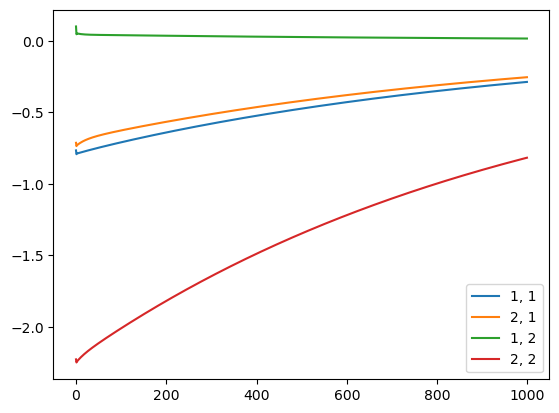

In [36]:
weight_1 = []
weight_2 = []
weight_3 = []
weight_4 = []

for weight in weigths:
    weight_1.append(weight[0, 0])
    weight_2.append(weight[1, 0])
    weight_3.append(weight[0, 1])
    weight_4.append(weight[1, 1])
    
plt.figure()
plt.plot(range(len(weigths)), weight_1, label="1, 1")
plt.plot(range(len(weigths)), weight_2, label="2, 1")
plt.plot(range(len(weigths)), weight_3, label="1, 2")
plt.plot(range(len(weigths)), weight_4, label="2, 2")
plt.legend()

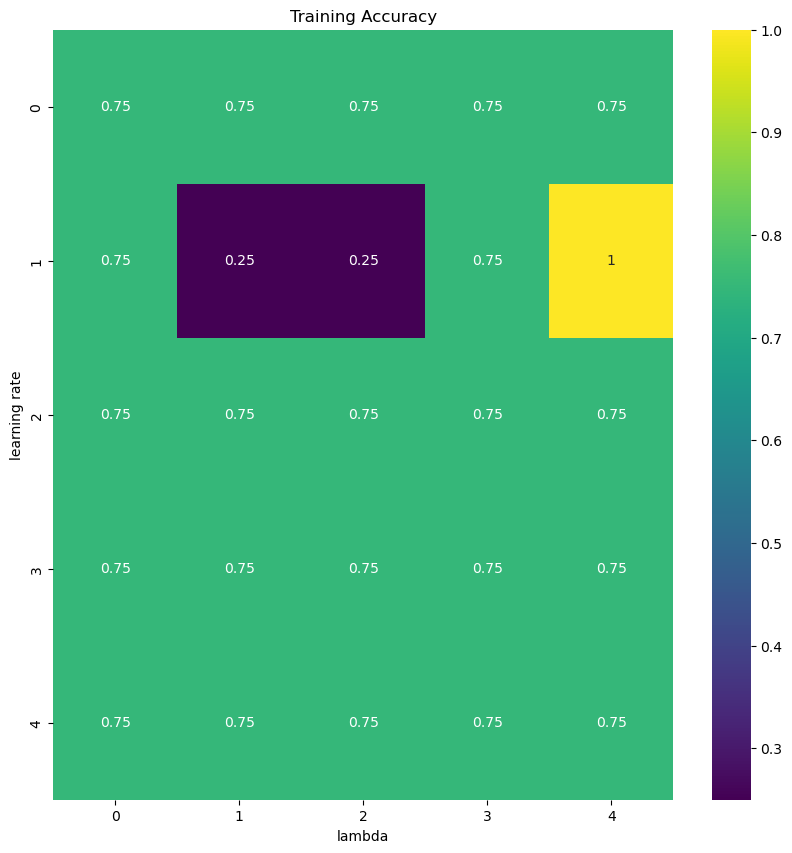

In [39]:
# Using and gate

cost_function = Cost_Functions('LogReg', target_AND)

learning_rates = np.logspace(-4, 0, 5)
lmbd_vals = np.logspace(-4, 0, 5)

accuracy = np.zeros((len(learning_rates), len(lmbd_vals)))

for i, lr in enumerate(learning_rates):
    for j, lmbd in enumerate(lmbd_vals):
        
        #print(f"Learning rate: {lr}")
        #print(f"Lambda: {lmbd}")
        
        optimizer = GradientDescent(learning_rate=lr)
        
        ffnn = Neural_Network(n_inputs, n_hidden_layers, n_hidden_nodes, n_outputs, 
                              cost_function=cost_function,
                              learning_rate=lr, 
                              lmbd=lmbd, 
                              activation_function_hidden='sigmoid',
                              activation_function_output='sigmoid',
                              optimizer=optimizer,
                              classification_problem=True)
        
        ffnn.train(X, num_iter=50)
        pred = ffnn.output_layer.output

        accuracy[i][j] = accuracy_score(target_AND, pred)
        
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(accuracy, annot=True, ax=ax, cmap="viridis")
ax.set_title("Training Accuracy")
ax.set_ylabel("learning rate")
ax.set_xlabel("lambda")
plt.show()

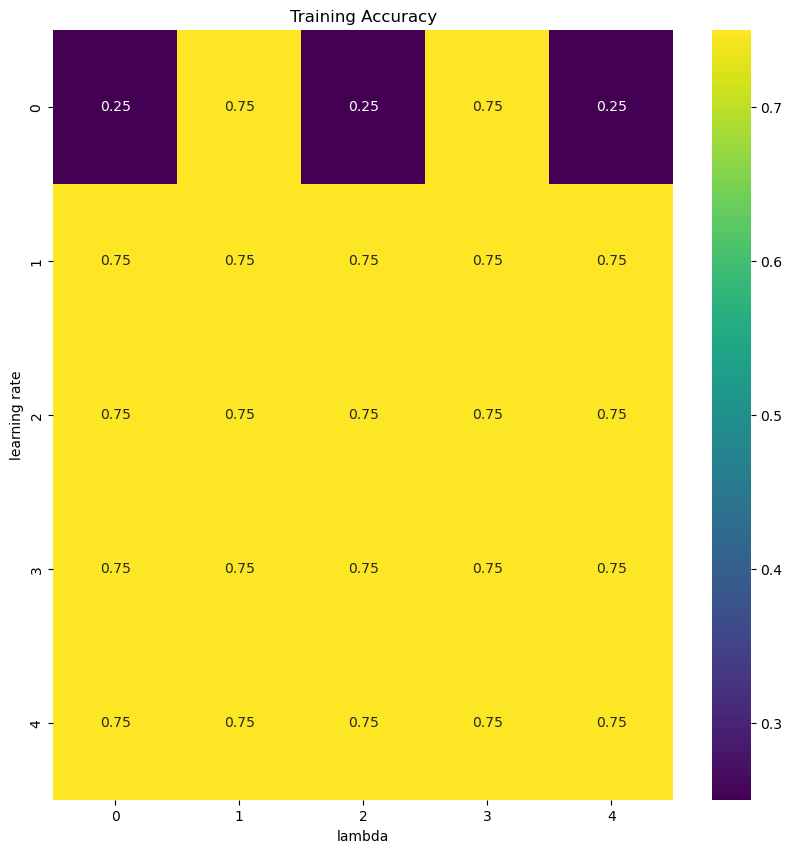

In [38]:
# Using and gate

cost_function = Cost_Functions('LogReg', target_AND)

learning_rates = np.logspace(-4, 0, 5)
lmbd_vals = np.logspace(-4, 0, 5)

accuracy = np.zeros((len(learning_rates), len(lmbd_vals)))

for i, lr in enumerate(learning_rates):
    for j, lmbd in enumerate(lmbd_vals):
        
        #print(f"Learning rate: {lr}")
        #print(f"Lambda: {lmbd}")
        
        optimizer = GradientDescent(learning_rate=lr)
        
        ffnn = Neural_Network(n_inputs, n_hidden_layers, n_hidden_nodes, n_outputs, 
                              cost_function=cost_function,
                              learning_rate=lr, 
                              lmbd=lmbd, 
                              activation_function_hidden='sigmoid',
                              activation_function_output='sigmoid',
                              optimizer=optimizer,
                              classification_problem=True)
        
        ffnn.train(X, num_iter=1000)
        pred = ffnn.output_layer.output

        accuracy[i][j] = accuracy_score(target_AND, pred)
        
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(accuracy, annot=True, ax=ax, cmap="viridis")
ax.set_title("Training Accuracy")
ax.set_ylabel("learning rate")
ax.set_xlabel("lambda")
plt.show()

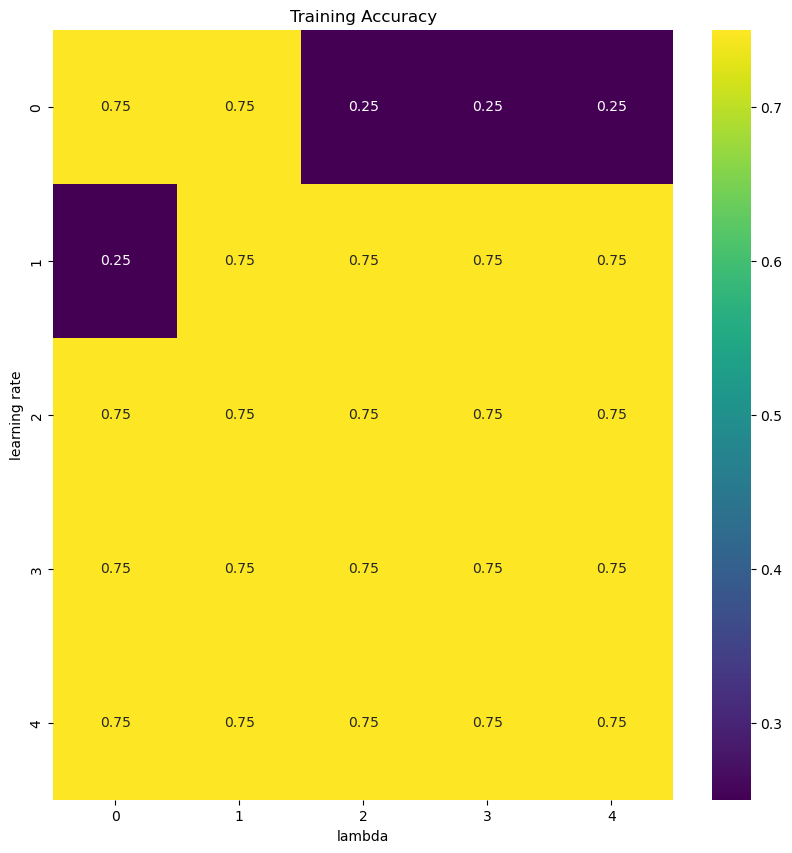

In [41]:
# Using or gate
cost_function = Cost_Functions('LogReg', target_OR)

learning_rates = np.logspace(-4, 0, 5)
lmbd_vals = np.logspace(-4, 0, 5)

accuracy = np.zeros((len(learning_rates), len(lmbd_vals)))

for i, lr in enumerate(learning_rates):
    for j, lmbd in enumerate(lmbd_vals):
        
        #print(f"Learning rate: {lr}")
        #print(f"Lambda: {lmbd}")
        
        optimizer = GradientDescent(learning_rate=lr)
        
        ffnn = Neural_Network(n_inputs, n_hidden_layers, n_hidden_nodes, n_outputs, 
                              cost_function=cost_function,
                              learning_rate=lr, 
                              lmbd=lmbd, 
                              activation_function_hidden='sigmoid',
                              activation_function_output='sigmoid',
                              optimizer=optimizer,
                              classification_problem=True)
        
        ffnn.train(X, num_iter=200)
        pred = ffnn.output_layer.output

        accuracy[i][j] = accuracy_score(target_OR, pred)
        
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(accuracy, annot=True, ax=ax, cmap="viridis")
ax.set_title("Training Accuracy")
ax.set_ylabel("learning rate")
ax.set_xlabel("lambda")
plt.show()

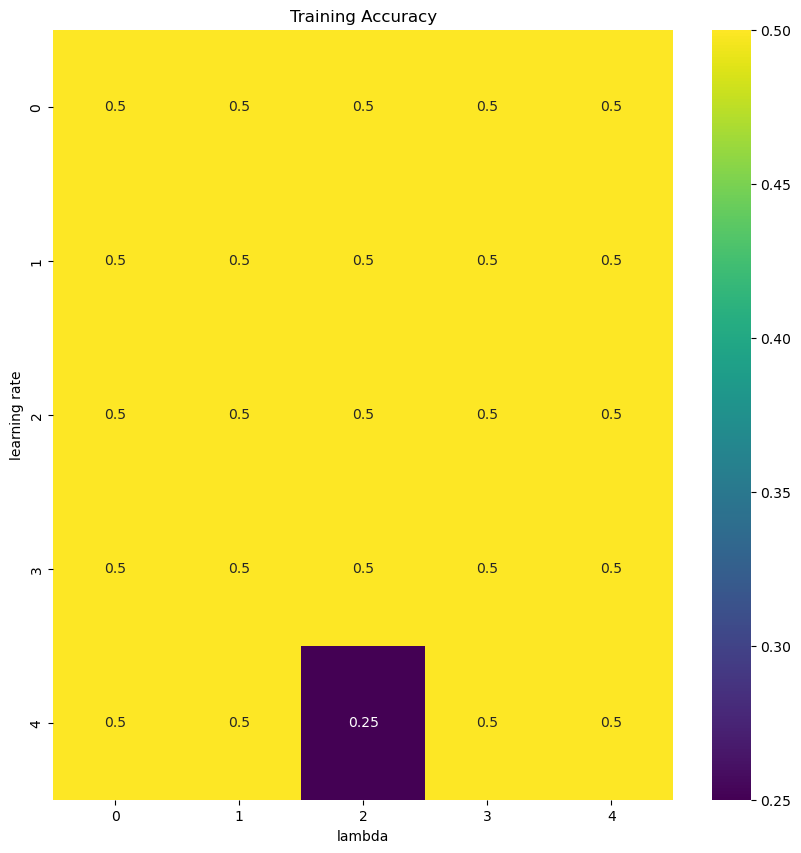

In [40]:
# Using xor gate
cost_function = Cost_Functions('LogReg', target_XOR)

learning_rates = np.logspace(-4, 0, 5)
lmbd_vals = np.logspace(-4, 0, 5)

accuracy = np.zeros((len(learning_rates), len(lmbd_vals)))

for i, lr in enumerate(learning_rates):
    for j, lmbd in enumerate(lmbd_vals):
        
        optimizer = GradientDescent(learning_rate=lr)
        
        ffnn = Neural_Network(n_inputs, n_hidden_layers, n_hidden_nodes, n_outputs, 
                              cost_function=cost_function,
                              learning_rate=lr, 
                              lmbd=lmbd, 
                              activation_function_hidden='sigmoid',
                              activation_function_output='sigmoid',
                              optimizer=optimizer,
                              classification_problem=True)
        
        ffnn.train(X, num_iter=100)
        pred = ffnn.output_layer.output

        accuracy[i][j] = accuracy_score(target_XOR, pred)
        
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(accuracy, annot=True, ax=ax, cmap="viridis")
ax.set_title("Training Accuracy")
ax.set_ylabel("learning rate")
ax.set_xlabel("lambda")
plt.show()

In [ ]:
np.random.seed(1234)

# Create design matrix
X_orig = jnp.array([[0, 0],
               [0, 1],
               [1, 0],
               [1, 1]])

#X = jnp.array([[0, 1]])

# The XOR gate
target_XOR = jnp.array( [ 0, 1 ,1, 0])
# The OR gate
target_OR = jnp.array( [ 0, 1 ,1, 1])
# The AND gate
target_AND = jnp.array( [ 0, 0 ,0, 1])

#target = jnp.array([0])


n_hidden_layers = 1
n_hidden_nodes = 2
n_outputs = 1
learning_rate=0.1

In [ ]:
#Testing AND gate
NN_output_AND = []

# AND gate
for X_row, target_row in zip(X_orig, target_AND):

    X = jnp.array([X_row])
    target = jnp.array([target_row])

    ffnn = Neural_Network(X, target, n_hidden_layers, n_hidden_nodes, n_outputs,
                      learning_rate, activation_function='sigmoid',
                      classification_problem=True)

    ffnn.feed_forward()

    ffnn.feed_backward()
    ffnn.train()

    NN_output_AND.append(ffnn.output_layer.output)

print(NN_output_AND)


In [ ]:

#Testing OR gate

NN_output_OR = []

# or gate
for X_row, target_row in zip(X_orig, target_OR):

    X = jnp.array([X_row])
    target = jnp.array([target_row])

    ffnn = Neural_Network(X, target, n_hidden_layers, n_hidden_nodes, n_outputs,
                      learning_rate, activation_function='sigmoid',
                      classification_problem=True)

    ffnn.feed_forward()

    ffnn.feed_backward()
    ffnn.train()

    NN_output_OR.append(ffnn.output_layer.output)

print(NN_output_OR)


In [ ]:
#Testing xor gate

NN_output_XOR = []

# xor gate
for X_row, target_row in zip(X_orig, target_XOR):

    X = jnp.array([X_row])
    target = jnp.array([target_row])

    ffnn = Neural_Network(X, target, n_hidden_layers, n_hidden_nodes, n_outputs,
                      learning_rate, activation_function='sigmoid',
                      classification_problem=True)

    ffnn.feed_forward()

    ffnn.feed_backward()
    ffnn.train()

    NN_output_XOR.append(ffnn.output_layer.output)

print(NN_output_XOR)


In [ ]:
def accuracy_test(y_true, y_pred):
    # y_true is the true labels of the data
    # y_pred is the predicted labels of the data by the neural network
    # Both y_true and y_pred are numpy arrays of the same shape

    # Compare y_true and y_pred element-wise and count the number of matches
    matches = 0
    for true, pred in zip(y_true, y_pred):
        if true == pred:
            matches = matches + 1

    # Calculate the accuracy as the ratio of matches to the total number of data points
    accuracy = matches / len(y_true)

    # Return the accuracy as a percentage
    return accuracy * 100


In [ ]:

accuracy_AND_gate = accuracy_test(target_AND, NN_output_AND)
accuracy_OR_gate = accuracy_test(target_OR, NN_output_OR)
accuracy_XOR_gate = accuracy_test(target_XOR, NN_output_XOR)

print(accuracy_AND_gate)
print(accuracy_OR_gate)
print(accuracy_XOR_gate)